In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import matplotlib.pyplot as plt
import swan_vis as swan
import yaml
from snakemake.io import expand

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from proc_revisions.utils import *
from proc_revisions.plotting import *
from proc_revisions.mane_utils import *

In [2]:
od = '../../proc_revisions/'
config_file = f'{od}/config.yml'
with open(config_file) as f:
    config = yaml.safe_load(f)

In [3]:
ab = od+expand(config['lr']['talon']['fusion_fix']['ab'], species='human')[0]
filt_ab = od+expand(config['lr']['cerberus']['filt_ab'], species='human')[0]
read_annot = od+expand(config['lr']['talon']['full_annot'], species='human')[0]
t_metadata = od+expand(config['ref']['cerberus']['new_gtf_t_info'], species='human')[0]
lib_meta = od+expand(config['lr']['meta'], species='human')[0]
swan_file = od+expand(config['lr']['swan']['sg'], species='human')[0]
cerberus_h5 = od+expand(config['lr']['cerberus']['ca_triplets'], species='human', obs_col='sample')[0]
cerb_t_metadata = od+expand(config['lr']['cerberus']['gtf_t_info'], species='human')[0]
major_isos = od+expand(config['lr']['analysis']['major_isos'], species='human', obs_col='sample')[0]
pi_tpm_table = od+expand(config['lr']['mane']['pi_tpm']['triplet'], species='human', obs_col='sample')[0]
pp_summary = od+expand(config['lr']['protein_pred']['summary'], species='human')[0]

ref_t_metadata = od+expand(config['ref']['new_gtf_t_info'], species='human')[0]
ref_g_metadata = od+expand(config['ref']['new_gtf_g_info'], species='human')[0]

sr_ab = '../'+config['sr']['ab']


ver = 'v40_cerberus'
min_tpm = 1
gene_subset = 'protein_coding'
obs_col = 'sample'
go_gene_subset = 'protein_coding'

m_ab = od+expand(config['lr']['talon']['fusion_fix']['ab'], species='mouse')[0]
m_filt_ab = od+expand(config['lr']['cerberus']['filt_ab'], species='mouse')[0]
m_read_annot = od+expand(config['lr']['talon']['full_annot'], species='mouse')[0]
m_t_metadata = od+expand(config['ref']['cerberus']['new_gtf_t_info'], species='mouse')[0]
m_lib_meta = od+expand(config['lr']['meta'], species='mouse')[0]
m_swan_file = od+expand(config['lr']['swan']['sg'], species='mouse')[0]
m_cerberus_h5 = od+expand(config['lr']['cerberus']['ca_triplets'], species='mouse', obs_col='sample')[0]
cerb_t_metadata = od+expand(config['lr']['cerberus']['gtf_t_info'], species='mouse')[0]
m_major_isos = od+expand(config['lr']['analysis']['major_isos'], species='mouse', obs_col='sample')[0]
m_pi_tpm_table = od+expand(config['lr']['mane']['pi_tpm']['triplet'], species='mouse', obs_col='sample')[0]
m_pp_summary = od+expand(config['lr']['protein_pred']['summary'], species='mouse')[0]


m_ref_t_metadata = od+expand(config['ref']['new_gtf_t_info'], species='mouse')[0]
m_ref_g_metadata = od+expand(config['ref']['new_gtf_g_info'], species='mouse')[0]


orth_table = '../../proc_revisions/ref/biomart_human_to_mouse.tsv'


mouse_ver = 'vM25_cerberus'

In [4]:
species = 'human'

Calculating iso TPM values
Subsetting for protein_coding genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2110: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2109: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 236615
# isos >= 1 tpm: 213476
Applying gene type and novelty subset
Number of isos reported: 191325
Found 51 total samples
721205
559167
Median predominant transcripts / gene: 2.0
17433
12357
12357/17433 70.88% protein-coding genes have >1 predominant isoforms across samples


<Figure size 216x360 with 0 Axes>

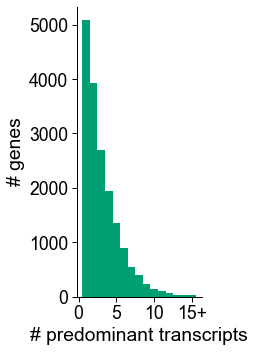

In [5]:
fname = 'figures/predom_isos_per_gene.pdf'
df, gb_df = plot_n_predom_transcripts(pi_tpm_table,
                          filt_ab,
                          ver,
                          gene_subset,
                          min_tpm,
                          fname,
                          species='human',
                          max_isos=15,
                          figsize=(3,5))

In [6]:
# get unique transcript gene combinationes
df = df[['tid', 'gid', 'gname']].drop_duplicates()
ca = cerberus.read(cerberus_h5)
gtf_df,_,_ = get_gtf_info(ver='v40_cerberus', add_stable_gid=True)

In [7]:
# what does diversity look like between these guys? 
tids = df.tid.tolist() 
df = ca.get_subset_triplets(tids, source='predominant_isos')
df.rename({'gene_id':'gid'}, axis=1, inplace=True)
df = df.merge(gtf_df[['gid_stable', 'gname', 'biotype_category']], how='left', left_on='gid', right_on='gid_stable')
ca.add_triplets(df)

Median predominant tsss / gene: 1.0
17433
7447
7447/17433 42.72% protein-coding genes have >1 predominant tss across samples

Median predominant ics / gene: 2.0
17433
10177
10177/17433 58.38% protein-coding genes have >1 predominant ic across samples

Median predominant tess / gene: 1.0
17433
8489
8489/17433 48.70% protein-coding genes have >1 predominant tes across samples



<Figure size 216x360 with 0 Axes>

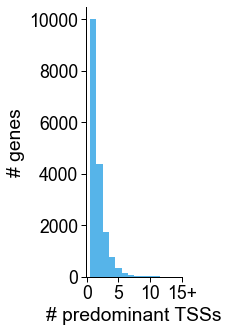

<Figure size 216x360 with 0 Axes>

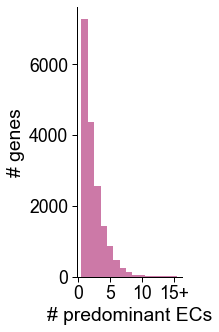

<Figure size 216x360 with 0 Axes>

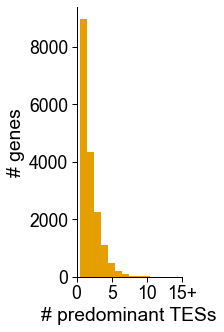

In [17]:
# number of predominant TSSs , ECs, TESs / gene
max_isos = 15
figsize=(3,5)
for feat in ['tss', 'ic', 'tes']:
    n_col = f'n_{feat}'
    temp = df[[n_col, 'gid_stable']].copy(deep=True)
    temp.rename({n_col: 'n_predom_ts'}, axis=1, inplace=True)
    
    sns.set_context('paper', font_scale=2)
    mpl.rcParams['font.family'] = 'Arial'
    mpl.rcParams['pdf.fonttype'] = 42
    color = get_feat_colors()[0][feat]

    # a wee bit of math
    print(f'Median predominant {feat}s / gene: {temp.n_predom_ts.median()}')
    temp['one_iso'] = temp.n_predom_ts == 1
    temp2 = temp[['n_predom_ts', 'one_iso']].groupby('one_iso').count().reset_index()
    n = temp2.n_predom_ts.sum(axis=0)
    n_num = temp2.loc[temp2.one_iso == False, 'n_predom_ts'].values[0]
    print(n)
    print(n_num)
    print(f'{n_num}/{n} {(n_num/n)*100:.2f}% protein-coding genes have >1 predominant {feat} across samples')
    
    if max_isos:
        temp.loc[temp.n_predom_ts>=max_isos, 'n_predom_ts'] = max_isos
        xticks = [i for i in range(0, max_isos+1, 5)]
        xtick_labels = [str(xtick) for xtick in xticks]
        xtick_labels[-1] = f'{max_isos}+'


    # and make a beautiful plot
    plt.figure(figsize=figsize)
    height = figsize[1]
    width = figsize[0]
    aspect = width/height

    ax = sns.displot(temp, x='n_predom_ts', kind='hist',
             discrete=True,
             color=color,
             linewidth=0,
             alpha=1,
             height=height,
                     aspect=aspect)
    if feat in ['tss', 'tes']:
        label = feat.upper()
    elif feat == 'ic':
        label = 'EC'
    else:
        label = feat.capitalize()
    xlabel = f'# predominant {label}s'
    ylabel = '# genes'
    _ = ax.set(xlabel=xlabel, ylabel=ylabel)

    if max_isos:
        sub_ax = plt.gca()
        sub_ax.set_xticks(xticks)
        sub_ax.set_xticklabels(xtick_labels)

    fname = f'figures/predom_{feat}_per_gene_barplot.pdf'
    plt.savefig(fname, dpi=500, bbox_inches='tight')
    print()

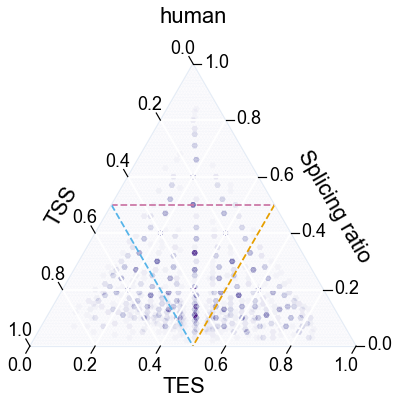

<Figure size 432x288 with 0 Axes>

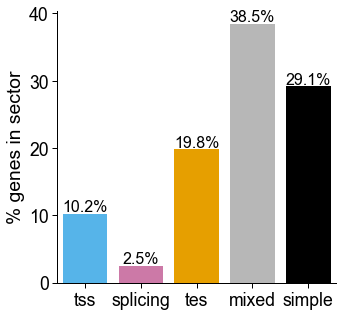

<Figure size 432x288 with 0 Axes>

In [18]:
c_dict, order = get_sector_colors()

fname = f'figures/{species}_predominant_simplex.pdf'
subset = {'source': 'predominant_isos'}
title = species

temp = ca.plot_simplex(top='splicing_ratio',
        subset=subset,
        density=True,
        density_scale=100,
        density_cmap='Purples',
        log_density=True,
        sectors=True,
        scatter=False,
        legend=False,
        title=title,
        size_scale=0.6,
        density_cbar=False,
        fname=fname)

plt.show()
plt.clf()


temp = temp[['gid', 'sector']].groupby('sector').count().reset_index().rename({'gid': 'n_genes'}, axis=1)
temp['total'] = temp.n_genes.sum()
temp['perc'] = (temp['n_genes']/temp['total'])*100

sns.set_context('paper', font_scale=2)
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42
plt.figure(figsize=(5,5))

ax = sns.barplot(data=temp, y='perc', x='sector',
                 palette=c_dict, order=order,
                 saturation=1)
                 # , height=3, aspect=1.2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('% genes in sector')
ax.set_xlabel('')

def add_perc_2(ax):
    ylim = ax.get_ylim()[1]
    n_cats = len(ax.patches)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height())
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() + ylim*0.01
        ax.annotate(percentage, (x, y), size=16, horizontalalignment='center')

add_perc_2(ax)
fname = f'figures/{species}_genes_per_sector.pdf'
plt.savefig(fname, dpi=500)
plt.show()
plt.clf()

In [22]:
ca.triplets.tail()

,source,gid,n_tss,n_tes,n_ic,n_iso,splicing_ratio,tss_ratio,tes_ratio,spl_ratio,sector,gname,sample,gene_tpm,gid_stable,biotype_category
17428,predominant_isos,ENSG00000285791,1.0,1.0,1.0,1.0,1.000000,0.333333,0.333333,0.333333,simple,ENSG00000285791,NaN,NaN,ENSG00000285791,protein_coding
17429,predominant_isos,ENSG00000285815,1.0,1.0,1.0,1.0,1.000000,0.333333,0.333333,0.333333,simple,GET1-SH3BGR,NaN,NaN,ENSG00000285815,protein_coding
17430,predominant_isos,ENSG00000285816,1.0,2.0,1.0,2.0,0.666667,0.272727,0.545455,0.181818,tes,ENSG00000285816,NaN,NaN,ENSG00000285816,protein_coding
17431,predominant_isos,ENSG00000285827,1.0,1.0,1.0,1.0,1.000000,0.333333,0.333333,0.333333,simple,ENSG00000285827,NaN,NaN,ENSG00000285827,protein_coding
17432,predominant_isos,ENSG00000285976,2.0,2.0,1.0,2.0,0.500000,0.444444,0.444444,0.111111,mixed,ENSG00000285976,NaN,NaN,ENSG00000285976,protein_coding


In [26]:
ca.triplets = cerberus.assign_sector(ca.triplets)
c_dict, order = get_sector_colors()

# how does overall sector of gene relate to the predominant sector of genes?
obs_source = 'obs_det'
predom_source = 'predominant_isos'

df = compute_dists([ca, ca],
                   [obs_source, 
                   predom_source],
                   gene_subsets=[gene_subset, gene_subset],
                   ver=[ver,  ver])

sect1 = f'sector_{obs_source}'
sect2 = f'sector_{predom_source}'
temp = df[[sect1, sect2, 'gid']]
temp = temp.groupby([sect1, sect2]).count().reset_index().rename({'gid': 'n_genes'}, axis=1)

temp[sect1] = pd.Categorical(temp[sect1],
                             categories=order,
                             ordered=True)
temp[sect2] = pd.Categorical(temp[sect2],
                             categories=order,
                             ordered=True)
temp = temp.pivot(index=sect1, columns=sect2, values='n_genes')

sns.set_context('paper', font_scale=1.5)

mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42

# using the upper triangle matrix as mask 
ax =  sns.heatmap(temp, annot=True,
                  fmt='.0f',
                  cmap='Purples')
ax.set(ylabel='Observed sector', xlabel='Predominant sector')
plt.tight_layout()
# plt.show()
fname = 'figures/human_predom_vs_obs_det_genes_per_sect.pdf'
plt.savefig(fname, dpi=500)
plt.clf()


<Figure size 432x288 with 0 Axes>

In [24]:
temp.head()

sector_predominant_isos,tss,splicing,tes,mixed,simple
sector_obs_det,,,,,
tss,1150.0,12.0,34.0,608.0,213.0
splicing,20.0,173.0,25.0,427.0,468.0
tes,57.0,21.0,2725.0,1195.0,529.0
mixed,548.0,224.0,665.0,4473.0,1970.0
simple,NaN,NaN,NaN,NaN,1896.0


## Mouse

In [9]:
species = 'mouse'

Calculating iso TPM values
Subsetting for protein_coding genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2110: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2109: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 153398
# isos >= 1 tpm: 142504
Applying gene type and novelty subset
Number of isos reported: 130679
Found 32 total samples
477595
403038
Median predominant transcripts / gene: 2.0
17299
9754
9754/17299 56.38% protein-coding genes have >1 predominant isoforms across samples


<Figure size 216x360 with 0 Axes>

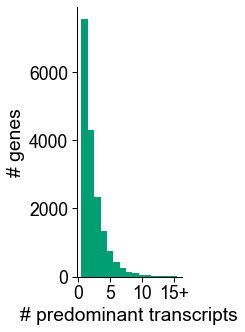

In [10]:
fname = 'figures/predom_isos_per_gene.pdf'
df, gb_df = plot_n_predom_transcripts(m_pi_tpm_table,
                          m_filt_ab,
                          mouse_ver,
                          gene_subset,
                          min_tpm,
                          fname,
                          species='mouse',
                          max_isos=15,
                          figsize=(3,5))

In [11]:
# get unique transcript gene combinationes
df = df[['tid', 'gid', 'gname']].drop_duplicates()

In [12]:
m_ca = cerberus.read(m_cerberus_h5)

In [13]:
gtf_df,_,_ = get_gtf_info(ver='vM25_cerberus', add_stable_gid=True)

In [14]:
# what does diversity look like between these guys? 
tids = df.tid.tolist() 
df = m_ca.get_subset_triplets(tids, source='predominant_isos')
df.rename({'gene_id':'gid'}, axis=1, inplace=True)
df = df.merge(gtf_df[['gid_stable', 'gname', 'biotype_category']], how='left', left_on='gid', right_on='gid_stable')
ca.add_triplets(df)


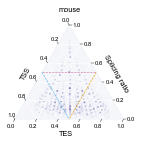

<Figure size 432x288 with 0 Axes>

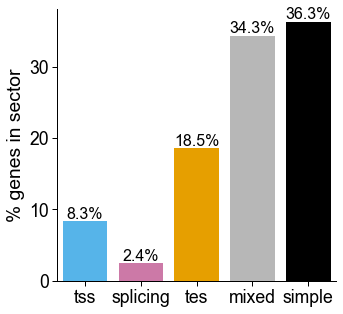

<Figure size 432x288 with 0 Axes>

In [15]:
c_dict, order = get_sector_colors()

fname = f'figures/{species}_predominant_simplex.pdf'
subset = {'source': 'predominant_isos'}
title = species

temp = ca.plot_simplex(top='splicing_ratio',
        subset=subset,
        density=True,
        density_scale=100,
        density_cmap='Purples',
        log_density=True,
        sectors=True,
        scatter=False,
        legend=False,
        title=title,
        size_scale=0.2,
        density_cbar=False,
        fname=fname)

plt.show()
plt.clf()


temp = temp[['gid', 'sector']].groupby('sector').count().reset_index().rename({'gid': 'n_genes'}, axis=1)
temp['total'] = temp.n_genes.sum()
temp['perc'] = (temp['n_genes']/temp['total'])*100

sns.set_context('paper', font_scale=2)
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42
plt.figure(figsize=(5,5))

ax = sns.barplot(data=temp, y='perc', x='sector',
                 palette=c_dict, order=order,
                 saturation=1)
                 # , height=3, aspect=1.2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('% genes in sector')
ax.set_xlabel('')

def add_perc_2(ax):
    ylim = ax.get_ylim()[1]
    n_cats = len(ax.patches)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height())
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() + ylim*0.01
        ax.annotate(percentage, (x, y), size=16, horizontalalignment='center')

add_perc_2(ax)
fname = f'figures/{species}_genes_per_sector.pdf'
plt.savefig(fname, dpi=500)
plt.show()
plt.clf()

In [ ]:
# how does overall sector of gene relate to the predominant sector of genes?
obs_source = 'obs_major'
predom_source = 'predominant_isos'

df = compute_dists([ca, ca],
                   [obs_source, 
                   predom_source],
                   gene_subsets=[gene_subset, gene_subset],
                   ver=[mouse_ver,  mouse_ver])

sect1 = f'sector_{obs_source}'
sect2 = f'sector_{predom_source}'
temp = df[[sect1, sect2, 'gid']]
temp = temp.groupby([sect1, sect2]).count().reset_index().rename({'gid': 'n_genes'}, axis=1)

temp[sect1] = pd.Categorical(temp[sect1],
                             categories=order,
                             ordered=True)
temp[sect2] = pd.Categorical(temp[sect2],
                             categories=order,
                             ordered=True)
temp = temp.pivot(index=sect1, columns=sect2, values='n_genes')

sns.set_context('paper', font_scale=1.5)

mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42

# using the upper triangle matrix as mask 
ax =  sns.heatmap(temp, annot=True,
                  fmt='.0f',
                  cmap='Purples')
ax.set(ylabel='Observed sector', xlabel='Predominant sector')
plt.tight_layout()
plt.show()
plt.clf()